In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [48]:
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [49]:
data = pd.read_csv("heart_2020_cleaned.csv")

In [50]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [52]:
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

#  Data Cleaning

In [53]:
num_cols = data.select_dtypes(exclude='object').columns
obj_cols = data.select_dtypes(include='object').columns[1:]

In [54]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [55]:
print(f"Unique Values for categorical columns:")
for col in data.select_dtypes(include='object'):
    print(f"  - {col}: {data[col].unique()}\n")

Unique Values for categorical columns:
  - HeartDisease: ['No' 'Yes']

  - Smoking: ['Yes' 'No']

  - AlcoholDrinking: ['No' 'Yes']

  - Stroke: ['No' 'Yes']

  - DiffWalking: ['No' 'Yes']

  - Sex: ['Female' 'Male']

  - AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

  - Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

  - Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

  - PhysicalActivity: ['Yes' 'No']

  - GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

  - Asthma: ['Yes' 'No']

  - KidneyDisease: ['No' 'Yes']

  - SkinCancer: ['Yes' 'No']



## Outliers

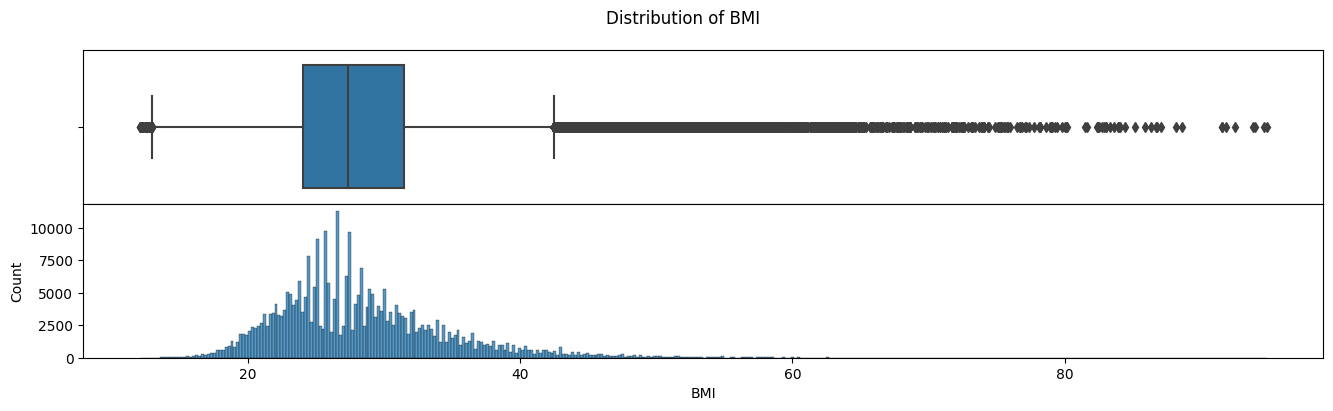

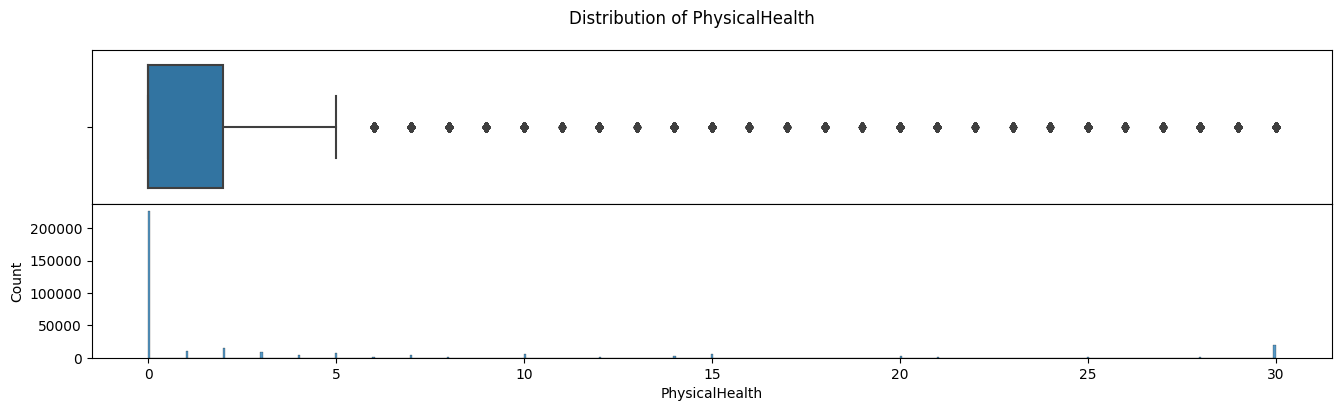

In [56]:
numerical = data.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=data, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=data, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

In [ ]:
for col in numerical:
  Q1, Q3 = data[col].quantile([0.25,0.75])
  IQR = Q3 - Q1
  right = Q3 + 1.5 * IQR
  left = Q1 - 1.5 * IQR
  n = len(data.loc[(data[col] < left) | (data[col] > right)])
  print(f"{col}:\n\tOutlier Num = {n}\n\tOutlier Percentage = {n*100/len(data):.2f}%\n")

BMI:
	Outlier Num = 3023
	Outlier Percentage = 3.02%

PhysicalHealth:
	Outlier Num = 15159
	Outlier Percentage = 15.16%

MentalHealth:
	Outlier Num = 16116
	Outlier Percentage = 16.12%

SleepTime:
	Outlier Num = 1537
	Outlier Percentage = 1.54%



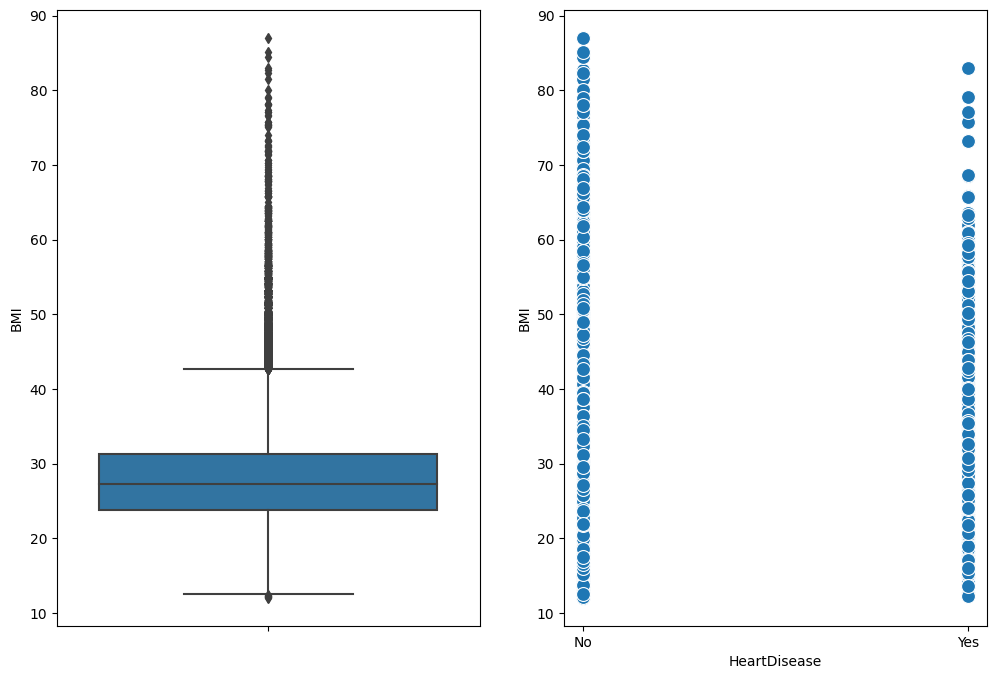

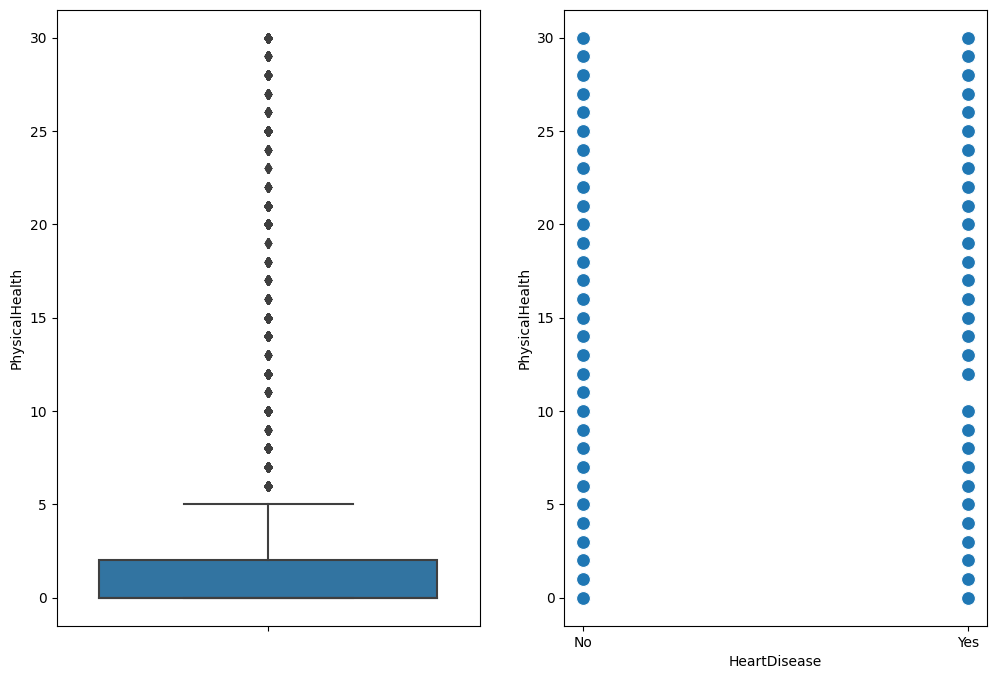

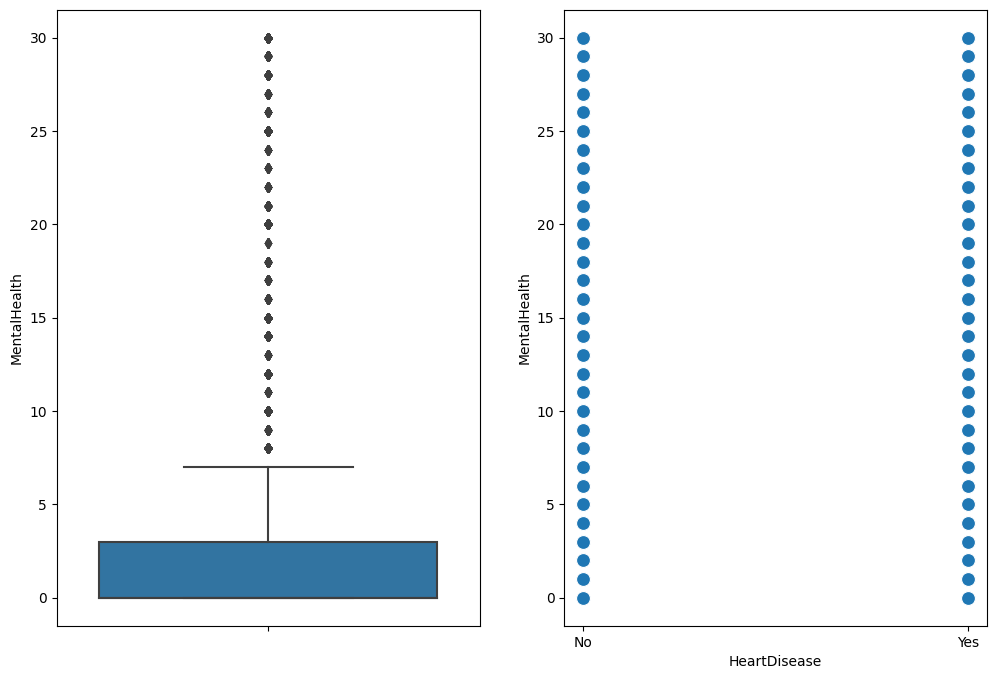

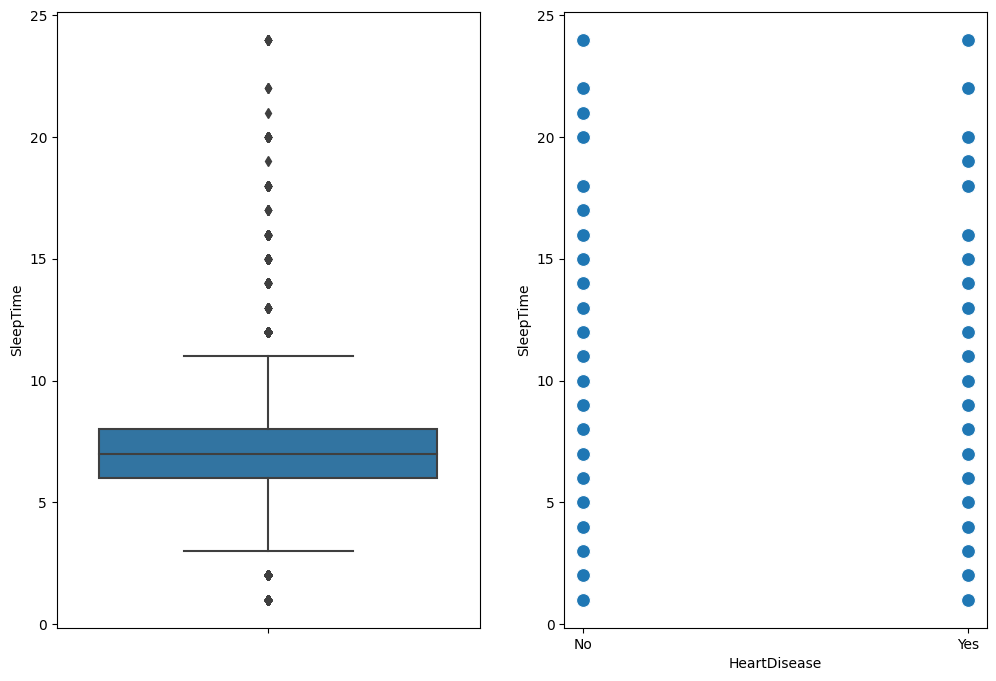

In [ ]:
num_cols = data.select_dtypes(exclude='object').columns
for col in num_cols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=data, y=col, ax=ax[0])
    sns.scatterplot(data=data,x = 'HeartDisease', s = 100, y=col, ax=ax[1])
    plt.show()

In [ ]:
zs = data.copy()
for col in num_cols:
  zs[col] = zscore(zs[col])
outscores = np.abs(zs[num_cols])
no_outliers = (outscores<=3.3).all(axis=1)
data = data[no_outliers]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91881 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      91881 non-null  object 
 1   BMI               91881 non-null  float64
 2   Smoking           91881 non-null  object 
 3   AlcoholDrinking   91881 non-null  object 
 4   Stroke            91881 non-null  object 
 5   PhysicalHealth    91881 non-null  float64
 6   MentalHealth      91881 non-null  float64
 7   DiffWalking       91881 non-null  object 
 8   Sex               91881 non-null  object 
 9   AgeCategory       91881 non-null  object 
 10  Race              91881 non-null  object 
 11  Diabetic          91881 non-null  object 
 12  PhysicalActivity  91881 non-null  object 
 13  GenHealth         91881 non-null  object 
 14  SleepTime         91881 non-null  float64
 15  Asthma            91881 non-null  object 
 16  KidneyDisease     91881 non-null  object

In [ ]:
data = data[:100000]

In [ ]:
label_encoder = LabelEncoder()
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity','Asthma', 'KidneyDisease', 'SkinCancer', 'Sex', 'Race']
for feature in categorical_features:
    print(data[feature].unique())
    data[feature]=label_encoder.fit_transform(data[feature])
    print(data[feature].unique())

data['AgeCategory'] = data['AgeCategory'].replace({'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8, '65-69':9, '70-74':10, '75-79':11, '80 or older':12})

data['GenHealth'] = data['GenHealth'].replace({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4})

data['Diabetic'] = data['Diabetic'].replace({'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3})



['No' 'Yes']
[0 1]
['Yes' 'No']
[1 0]
['No' 'Yes']
[0 1]
['No' 'Yes']
[0 1]
['No' 'Yes']
[0 1]
['Yes' 'No']
[1 0]
['Yes' 'No']
[1 0]
['No' 'Yes']
[0 1]
['Yes' 'No']
[1 0]
['Female' 'Male']
[0 1]
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
[5 2 1 0 4 3]


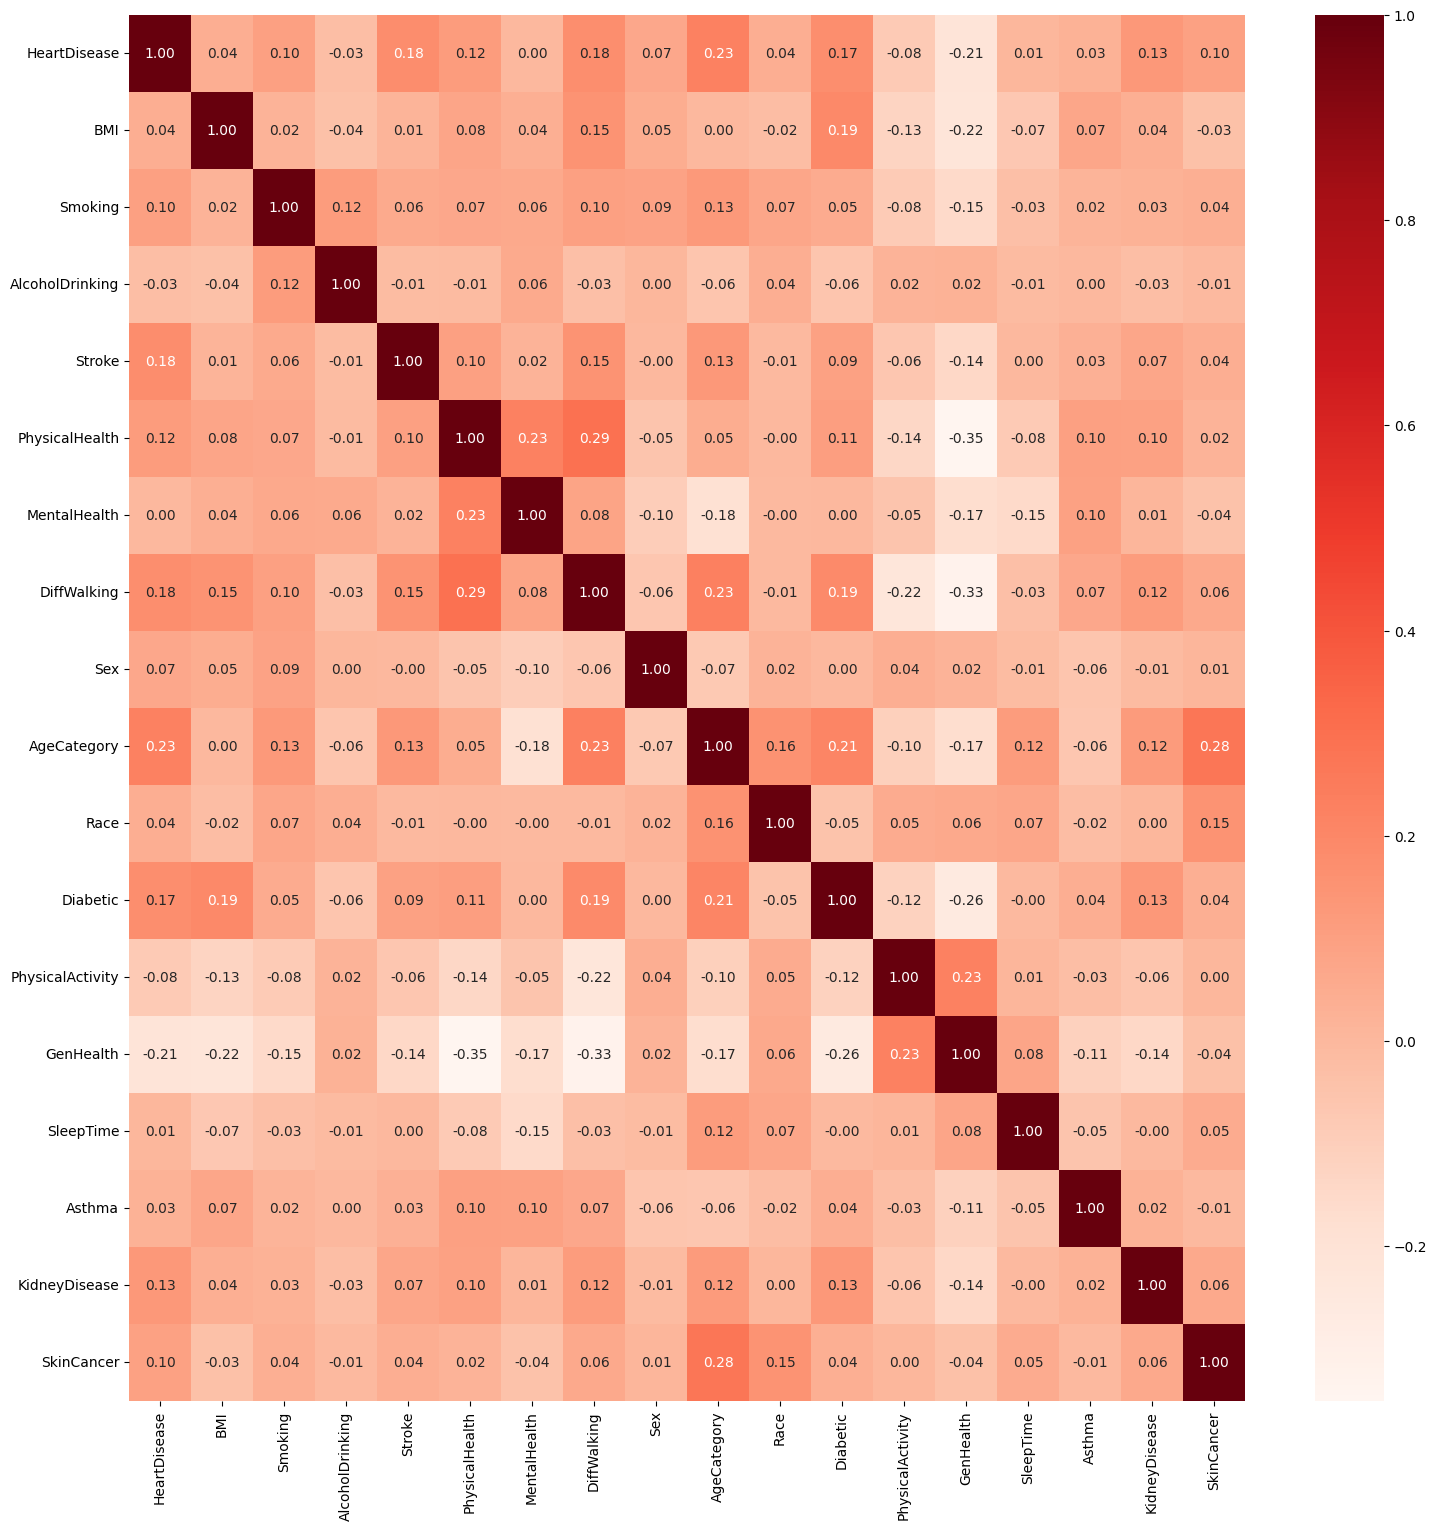

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [ ]:

X = data.drop(columns='HeartDisease')
Y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state = 44)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

# kNN

## Selecting number of neighbors

In [ ]:
def find_k(max_k, scaled_X_train, scaled_X_test,  y_train, y_test):
    error_rate = []
    for i in range(1, max_k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(scaled_X_train, y_train)
        pred_i = knn.predict(scaled_X_test)
        error_rate.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(15,10))
    plt.plot(range(1, max_k), error_rate, marker='o', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.grid()

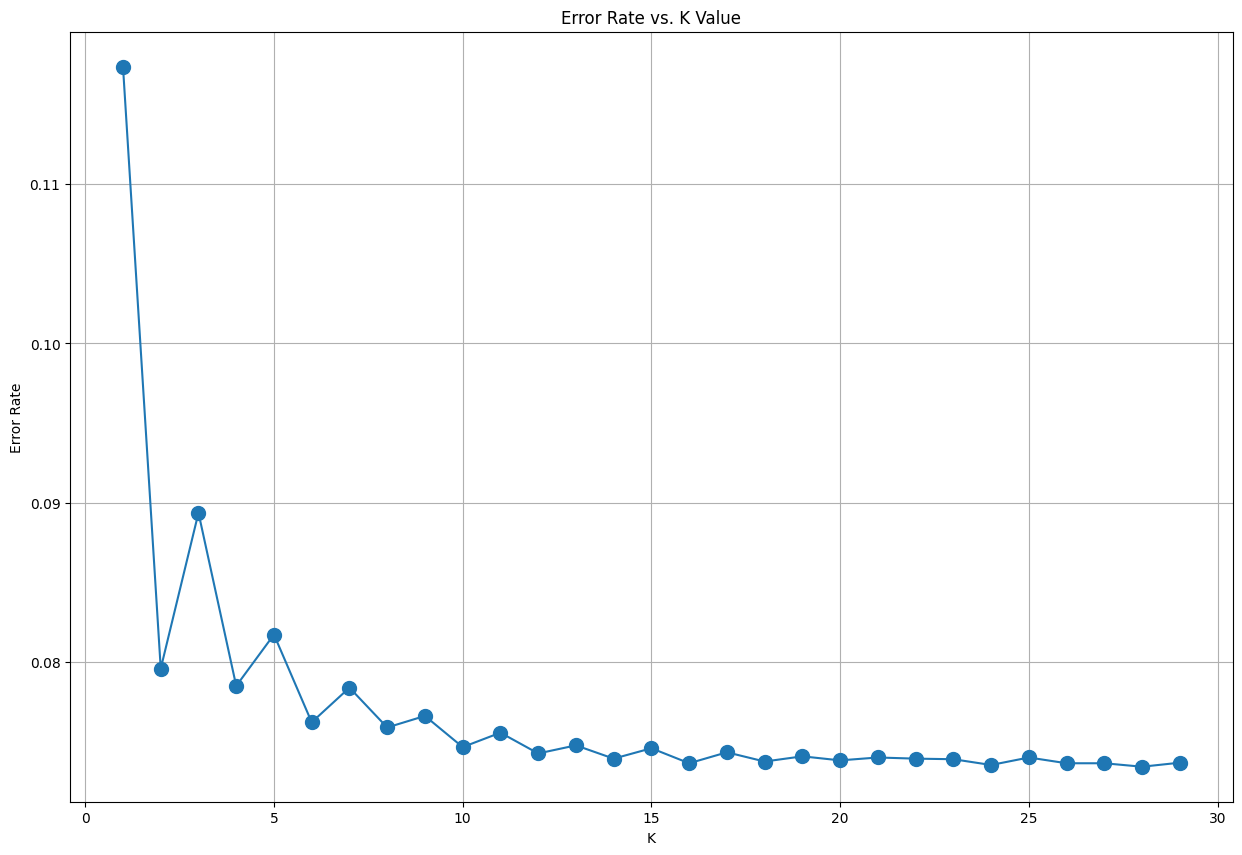

In [ ]:
find_k(30, scaled_X_train, scaled_X_test, y_train, y_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
pred = knn.predict(scaled_X_test)
print(confusion_matrix(y_test,pred))

[[25245   286]
 [ 1874   160]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25531
           1       0.36      0.08      0.13      2034

    accuracy                           0.92     27565
   macro avg       0.64      0.53      0.54     27565
weighted avg       0.89      0.92      0.90     27565



In [ ]:
print('Аccuracy:', accuracy_score(y_test,pred))

Аccuracy: 0.9216397605659351


# Decision Tree

In [ ]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[23608  1923]
 [ 1549   485]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     25531
           1       0.20      0.24      0.22      2034

    accuracy                           0.87     27565
   macro avg       0.57      0.58      0.57     27565
weighted avg       0.88      0.87      0.88     27565



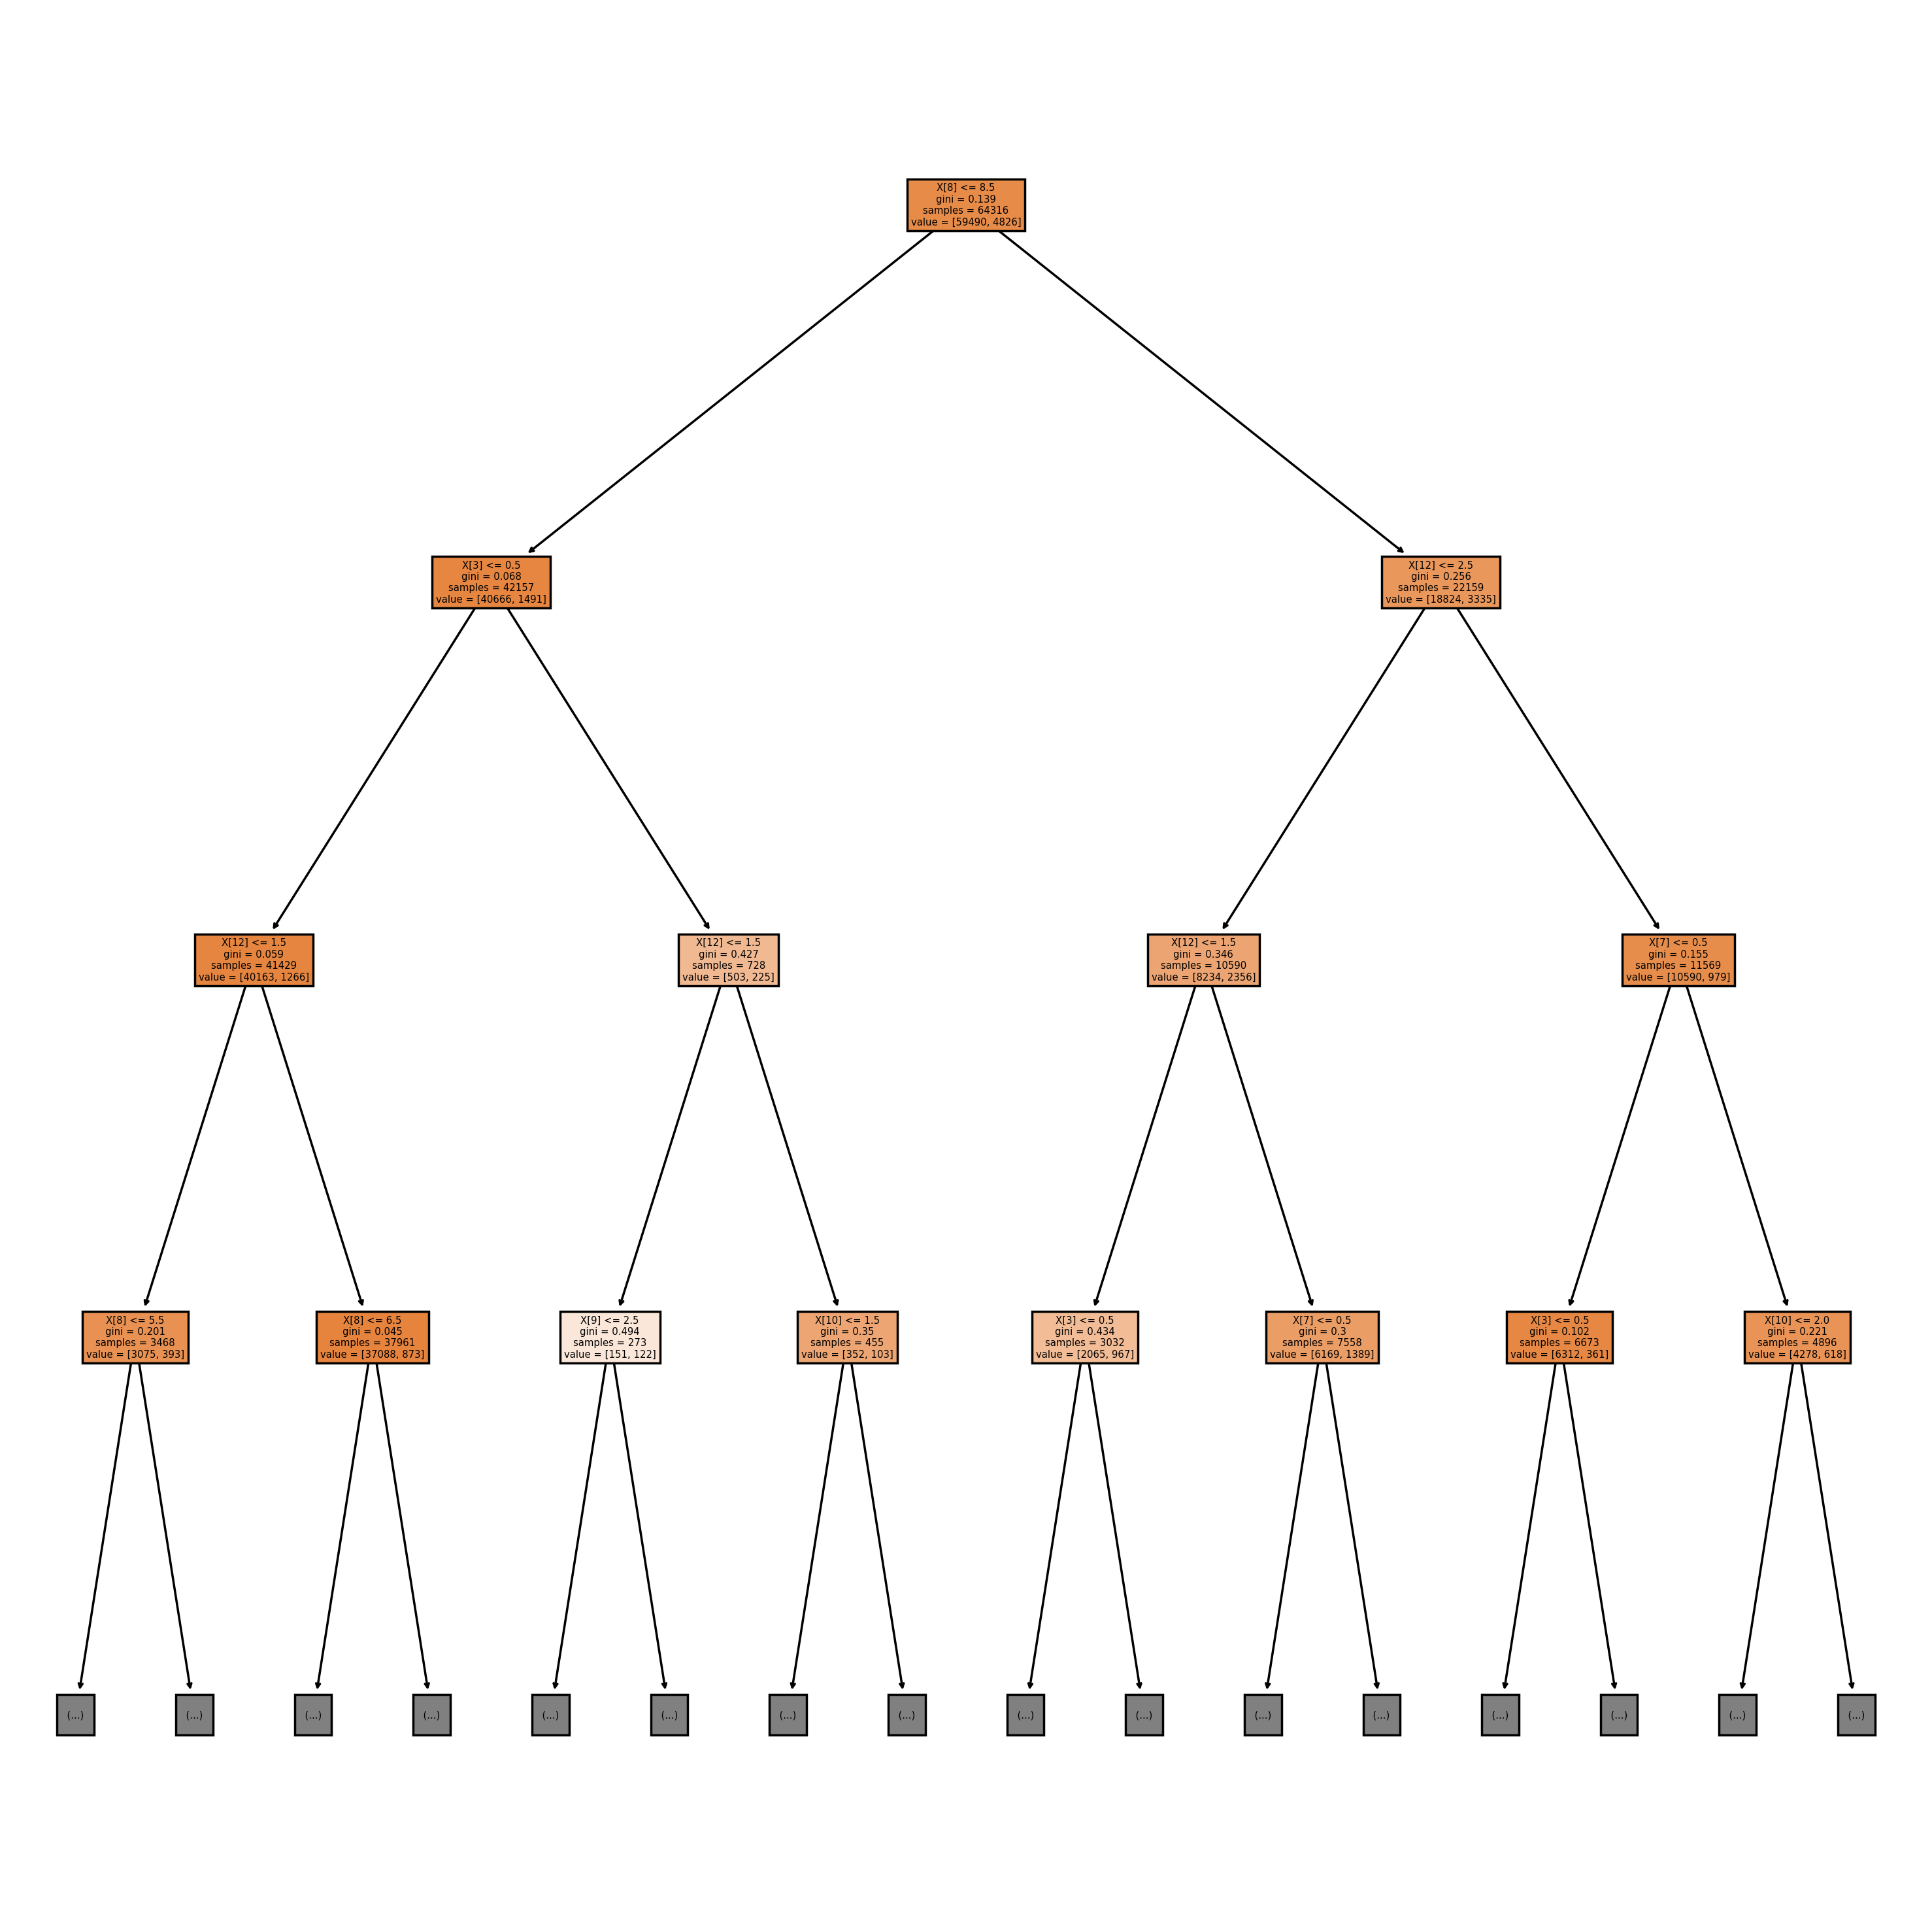

In [ ]:
plt.figure(figsize = (15, 15), dpi = 250)
plot_tree(model, filled = True, max_depth = 3)
plt.show()

In [ ]:
print('Аccuracy:', accuracy_score(y_test,y_pred))

Аccuracy: 0.874043170687466


# Random Forest

In [ ]:
for i in range (2, 23):
    forest = RandomForestClassifier (criterion='entropy', n_estimators = i)
    forest.fit(X_train, y_train) 
    y_pred = forest.predict(X_test)
    print ('Number of trees: ', i)
    print("Аccuracy: ", accuracy_score(y_test, y_pred))

Number of trees:  2
Аccuracy:  0.9160166878287683
Number of trees:  3
Аccuracy:  0.9037547614728823
Number of trees:  4
Аccuracy:  0.9180482495918737
Number of trees:  5
Аccuracy:  0.9102485035370942
Number of trees:  6
Аccuracy:  0.9175766370397243
Number of trees:  7
Аccuracy:  0.9123163431888264
Number of trees:  8
Аccuracy:  0.9180845274805006
Number of trees:  9
Аccuracy:  0.915218574278977
Number of trees:  10
Аccuracy:  0.9181208053691275
Number of trees:  11
Аccuracy:  0.9165971340467984
Number of trees:  12
Аccuracy:  0.9184835842553963
Number of trees:  13
Аccuracy:  0.9167059677126791
Number of trees:  14
Аccuracy:  0.9196081988028296
Number of trees:  15
Аccuracy:  0.9175040812624705
Number of trees:  16
Аccuracy:  0.9196807545800835
Number of trees:  17
Аccuracy:  0.9179394159259932
Number of trees:  18
Аccuracy:  0.9186286958099039
Number of trees:  19
Аccuracy:  0.9187012515871577
Number of trees:  20
Аccuracy:  0.9197895882459641
Number of trees:  21
Аccuracy:  0.918048

In [ ]:
forest = RandomForestClassifier (criterion='entropy', n_estimators = 6)
forest.fit(X_train, y_train) 
y_pred = forest.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[25103   428]
 [ 1868   166]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     25531
           1       0.28      0.08      0.13      2034

    accuracy                           0.92     27565
   macro avg       0.61      0.53      0.54     27565
weighted avg       0.88      0.92      0.90     27565



In [ ]:
print("Аccuracy: ", accuracy_score(y_test, y_pred))

Аccuracy:  0.9167059677126791


# AdaBoost

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[25349   182]
 [ 1833   201]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25531
           1       0.52      0.10      0.17      2034

    accuracy                           0.93     27565
   macro avg       0.73      0.55      0.56     27565
weighted avg       0.90      0.93      0.90     27565



In [ ]:
print('Аccuracy:', accuracy_score(y_test,y_pred))

Аccuracy: 0.926900054416833


# SVM

In [ ]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'sigmoid')

In [ ]:
model.fit(scaled_X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [ ]:
y_pred = model.predict(scaled_X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[23845  1686]
 [ 1679   355]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     25531
           1       0.17      0.17      0.17      2034

    accuracy                           0.88     27565
   macro avg       0.55      0.55      0.55     27565
weighted avg       0.88      0.88      0.88     27565



In [ ]:
print('Аccuracy:', accuracy_score(y_test,y_pred))

Аccuracy: 0.8779249047705423


# Gridsearch

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['sigmoid']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)

grid.fit(scaled_X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [ ]:
grid.best_estimator_

SVC(C=0.1, gamma=0.01, kernel='sigmoid')

In [ ]:
grid_predictions = grid.predict(scaled_X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[2522    0]
 [ 278    0]]


In [ ]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2522
           1       0.00      0.00      0.00       278

    accuracy                           0.90      2800
   macro avg       0.45      0.50      0.47      2800
weighted avg       0.81      0.90      0.85      2800



C:\Users\ANDB007\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANDB007\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANDB007\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.p

In [ ]:
print('Аccuracy:', accuracy_score(y_test,grid_predictions))

Аccuracy: 0.9007142857142857
